In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.stats import binom

In [4]:
walmart=pd.read_csv("walmart_data.csv")

In [3]:
walmart.shape

(550068, 10)

In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


No null values

In [6]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Unique Values

In [41]:
walmart["User_ID"].nunique()

5891

In [42]:
walmart["Product_ID"].nunique()

3631

In [43]:
walmart["Gender"].nunique()

2

In [44]:
walmart["Age"].nunique()

7

In [45]:
walmart["Occupation"].nunique()

21

In [47]:
walmart["City_Category"].nunique()

3

In [48]:
walmart["Stay_In_Current_City_Years"].nunique()

5

In [50]:
walmart["Marital_Status"].nunique()

2

In [51]:
walmart["Product_Category"].nunique()

20

In [52]:
walmart["Purchase"].nunique()

18105

# Value Counts

In [55]:
walmart["User_ID"].value_counts(normalize=True)*100

1001680    0.186522
1004277    0.177978
1001941    0.163253
1001181    0.156708
1000889    0.149618
             ...   
1002690    0.001273
1002111    0.001273
1005810    0.001273
1004991    0.001273
1000708    0.001091
Name: User_ID, Length: 5891, dtype: float64

In [56]:
walmart["Product_ID"].value_counts(normalize=True)*100

P00265242    0.341776
P00025442    0.293600
P00110742    0.293055
P00112142    0.283965
P00057642    0.267240
               ...   
P00314842    0.000182
P00298842    0.000182
P00231642    0.000182
P00204442    0.000182
P00066342    0.000182
Name: Product_ID, Length: 3631, dtype: float64

In [57]:
walmart["Gender"].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [58]:
walmart["Age"].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [59]:
walmart["Occupation"].value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [60]:
walmart["City_Category"].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [61]:
walmart["Stay_In_Current_City_Years"].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [62]:
walmart["Marital_Status"].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [63]:
walmart["Product_Category"].value_counts(normalize=True)

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

In [64]:
walmart["Purchase"].value_counts(normalize=True)

7011     0.000347
7193     0.000342
6855     0.000340
6891     0.000335
7012     0.000333
           ...   
23491    0.000002
18345    0.000002
3372     0.000002
855      0.000002
21489    0.000002
Name: Purchase, Length: 18105, dtype: float64

# Unique_Values

In [65]:
walmart["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [66]:
walmart["Product_ID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [67]:
walmart["Gender"].unique()

array(['F', 'M'], dtype=object)

In [74]:
walmart["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [73]:
walmart["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [72]:
walmart["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [68]:
walmart["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [69]:
walmart["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [70]:
walmart["Product_Category"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [71]:
walmart["Purchase"].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

# Univariate Analysis

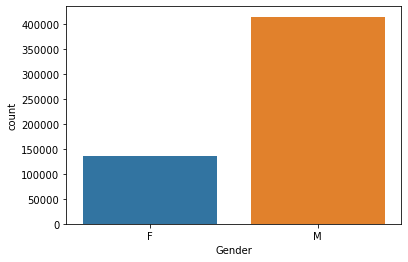

In [76]:
sns.countplot(data=walmart,x="Gender")
plt.show()

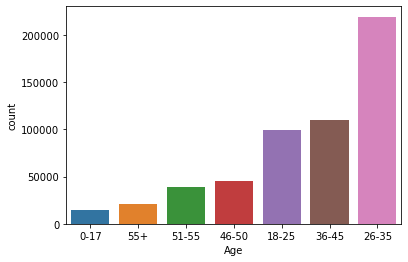

In [82]:
sns.countplot(data=walmart,x="Age",order=walmart.groupby("Age")["User_ID"].count().sort_values(ascending=True).index)
plt.show()

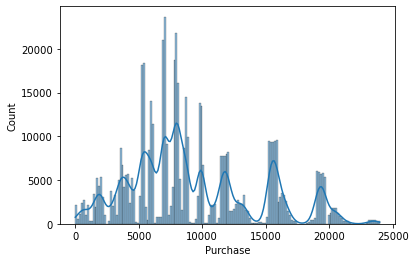

In [84]:
sns.histplot(data=walmart,x="Purchase",kde=True)
plt.show()

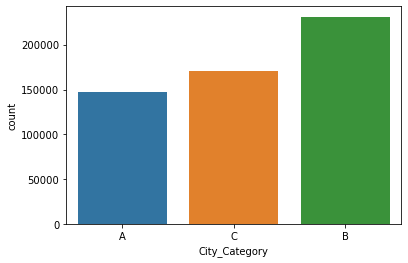

In [85]:
sns.countplot(data=walmart,x="City_Category")
plt.show()

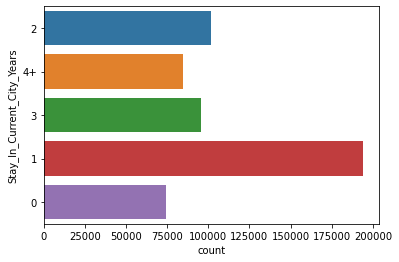

In [89]:
sns.countplot(data=walmart,y="Stay_In_Current_City_Years")
plt.show()

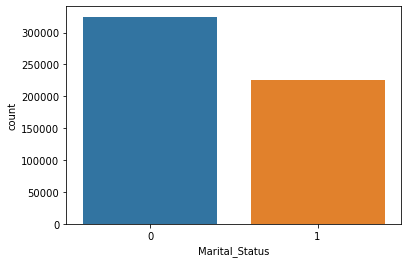

In [90]:
sns.countplot(data=walmart,x="Marital_Status")
plt.show()

In [92]:
walmart["Product_Category"].dtype

dtype('int64')

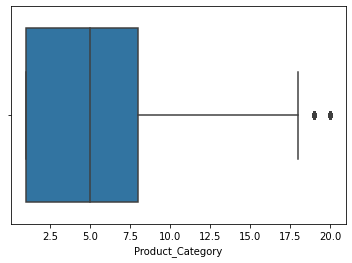

In [93]:
sns.boxplot(data=walmart,x="Product_Category")
plt.show()

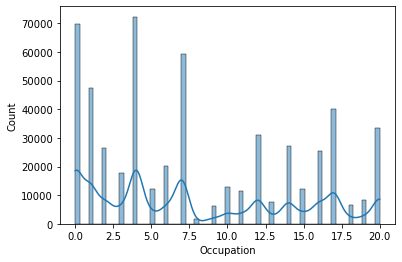

In [96]:
sns.histplot(data=walmart,x="Occupation",kde=True)
plt.show()

# Bivariate Analysis

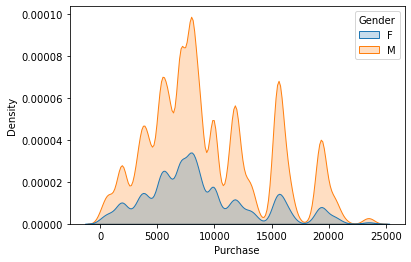

In [99]:
sns.kdeplot(data=walmart,x="Purchase",hue="Gender",shade=True)
plt.show()

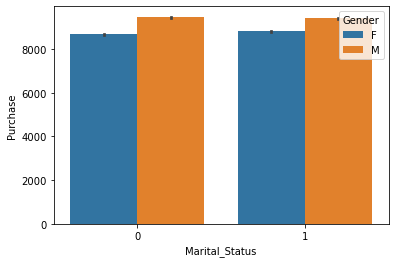

In [101]:
sns.barplot(data=walmart,x="Marital_Status",y="Purchase",hue="Gender")
plt.show()

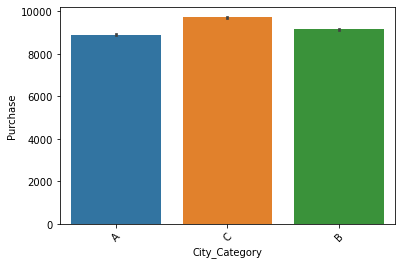

In [105]:
sns.barplot(data=walmart,x="City_Category",y="Purchase")
plt.xticks(rotation=45)
plt.show()

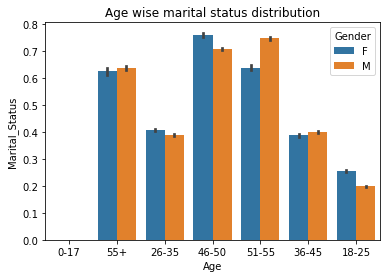

In [107]:
sns.barplot(data=walmart,x="Age",y="Marital_Status",hue="Gender")
plt.title("Age wise marital status distribution")
plt.show()

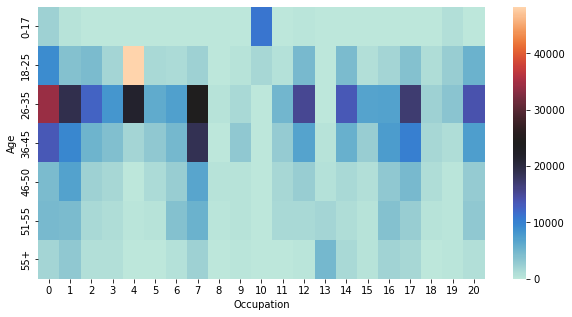

In [117]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(index=walmart["Age"],columns=walmart["Occupation"]),cmap="icefire")
plt.show()

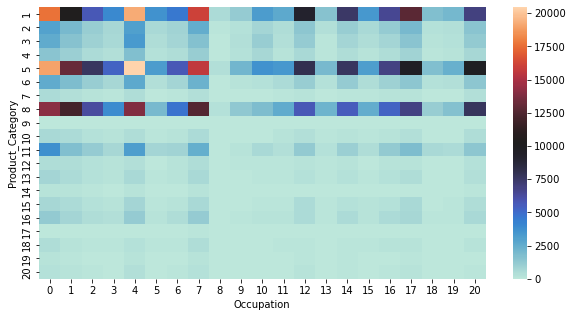

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(index=walmart["Product_Category"],columns=walmart["Occupation"]),cmap="icefire")
plt.show()

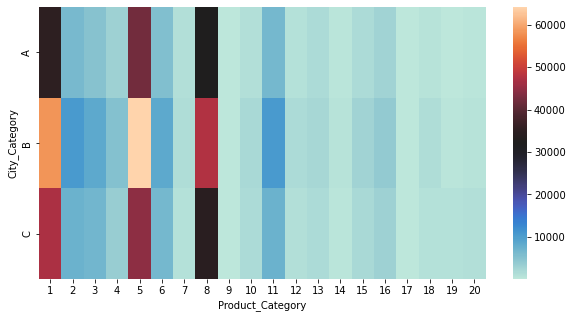

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(index=walmart["City_Category"],columns=walmart["Product_Category"]),cmap="icefire")
plt.show()

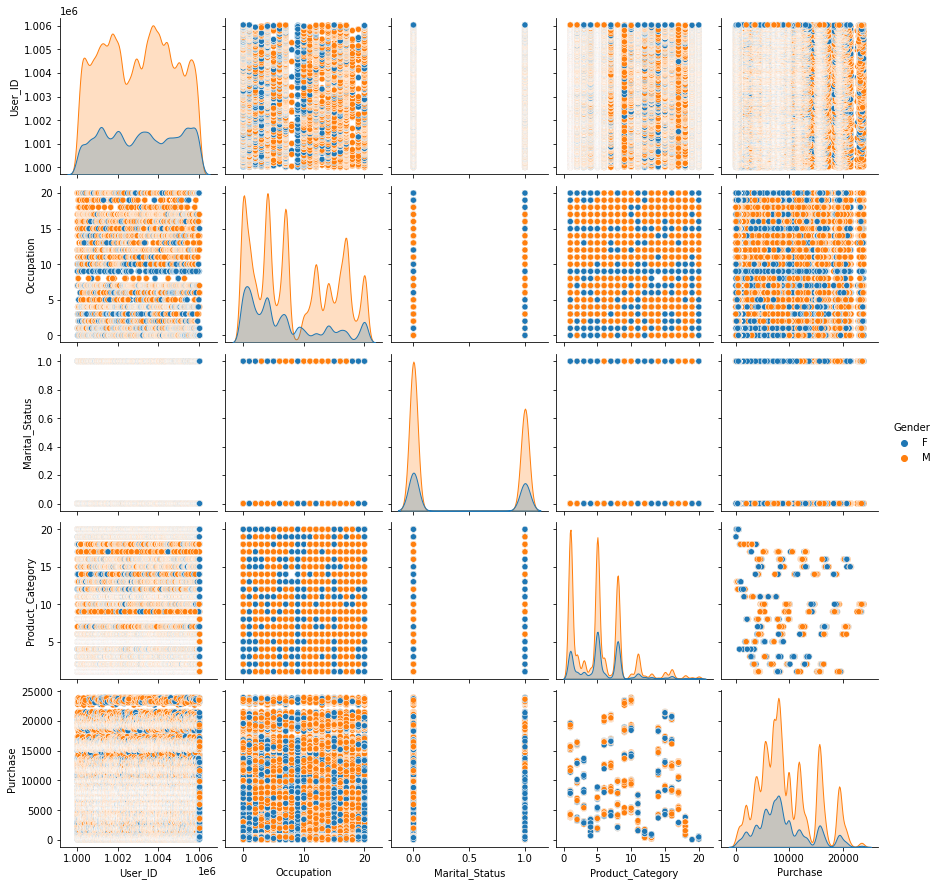

In [106]:
sns.pairplot(data=walmart,hue="Gender")
plt.show()

# Statistical Summary

In [11]:
walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


# Null Value and outlier detection

In [12]:
walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
# No null values means no missing values in the datatset

In [16]:
Purchase_25=np.percentile(walmart["Purchase"],25)
Purchase_25

5823.0

In [17]:
Purchase_75=np.percentile(walmart["Purchase"],75)
Purchase_75

12054.0

In [18]:
IQR=Purchase_75-Purchase_25
IQR

6231.0

In [19]:
Upper_whisker=Purchase_75+1.5*IQR
Upper_whisker

21400.5

In [20]:
Lower_whisker=Purchase_75-1.5*IQR
Lower_whisker

2707.5

In [26]:
Outlier_pct=walmart[(walmart["Purchase"]>Upper_whisker) | (walmart["Purchase"]<Lower_whisker)].shape[0]/walmart.shape[0]*100
Outlier_pct

7.207836122079452

There are 7.2% data that are outliers in the walmart Purchase column.

# Business Insights based on Non- Graphical and Visual Analysis 

# CLT and Confidence Interval for Male and female Customers

In [27]:
walmart_female_purchase=walmart.loc[walmart["Gender"]=="F","Purchase"]

In [28]:
walmart_female_purchase

0          8370
1         15200
2          1422
3          1057
14         5378
          ...  
550061      599
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 135809, dtype: int64

In [29]:
walmart_male_purchase=walmart.loc[walmart["Gender"]=="M","Purchase"]

In [30]:
walmart_male_purchase

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

As creating a sample of 50 million female and 50 million male customers using bootstrap would take higher time, we will assume a sample distribution of means of 50 samples to create a population of 50 million.

As Central limit theorem states that the sample distribution of means will be a Gaussian distribution given that we consider a bigger sample.If Sample_size>30, we can assume Gaussian Distribution.

In [37]:
female_sample_mean=walmart_female_purchase.mean()
female_sample_mean

8734.565765155476

In [32]:
female_population_std=walmart_female_purchase.std()

In [33]:
female_sample_std=female_population_std/np.sqrt(50)

Calculating z score of 2.5 percentile and 97.5 percentile

In [34]:
z_95_lower=norm.ppf(0.025)

In [35]:
z_95_upper=norm.ppf(0.975)

In [36]:
female_95pct_confidence=(female_sample_mean+z_95_lower*female_sample_std,female_sample_mean+z_95_upper*female_sample_std)
female_95pct_confidence

(7413.180395716255, 10055.951134594696)

90 Percentile female purchases

In [38]:
z_90_lower=norm.ppf(0.05)

In [39]:
z_90_upper=norm.ppf(0.95)

In [40]:
female_90pct_confidence=(female_sample_mean+z_90_lower*female_sample_std,female_sample_mean+z_90_upper*female_sample_std)
female_90pct_confidence

(7625.62420568454, 9843.507324626411)

99 percentile female purchases

In [41]:
z_99_lower=norm.ppf(0.005)

In [42]:
z_99_upper=norm.ppf(0.995)

In [43]:
female_99pct_confidence=(female_sample_mean+z_99_lower*female_sample_std,female_sample_mean+z_99_upper*female_sample_std)
female_99pct_confidence

(6997.971020185672, 10471.160510125279)

Male Calculations


In [44]:
male_sample_mean=walmart_male_purchase.mean()
male_sample_mean

9437.526040472265

In [45]:
male_population_std=walmart_male_purchase.std()

In [46]:
male_sample_std=male_population_std/np.sqrt(50)

90 percentile Male purchases

In [47]:
z_90_lower_male=norm.ppf(0.05)
z_90_upper_male=norm.ppf(0.95)
male_90pct_confidence=(male_sample_mean+z_90_lower_male*male_sample_std,male_sample_mean+z_90_upper_male*male_sample_std)
male_90pct_confidence

(8252.994767527816, 10622.057313416713)

95 percentile Male Purchases

In [48]:
z_95_lower_male=norm.ppf(0.025)
z_95_upper_male=norm.ppf(0.975)
male_95pct_confidence=(male_sample_mean+z_95_lower_male*male_sample_std,male_sample_mean+z_95_upper_male*male_sample_std)
male_95pct_confidence

(8026.069971985875, 10848.982108958655)

99 percentile Male Purchases

In [49]:
z_99_lower_male=norm.ppf(0.005)
z_99_upper_male=norm.ppf(0.995)
male_99pct_confidence=(male_sample_mean+z_99_lower_male*male_sample_std,male_sample_mean+z_99_upper_male*male_sample_std)
male_99pct_confidence

(7582.558331597577, 11292.493749346952)

Female Purchases have a mean of 8734.56 with 95% Confidence Interval in range (7413.180395716255, 10055.951134594696)

Male Purchases have a mean of 9437.52 with 95% Confidence Interval in range (8026.069971985875, 10848.982108958655)

As the 95% confidence interval of male and female purchases **Coincides** with each other, the purchases of male and female are **statistically insignificant** 

#### Creating a sample for cross checking the above data

In [78]:
sample_walmart_female=[walmart_female["Purchase"].sample(50).mean() for i in range(10000)]

In [79]:
sample_walmart_female

[7957.72,
 9694.34,
 7723.74,
 10037.14,
 8861.86,
 10010.86,
 8967.56,
 8128.64,
 9284.06,
 9453.92,
 9299.2,
 9658.32,
 8590.96,
 8529.92,
 9073.7,
 8111.94,
 8981.96,
 8438.52,
 9270.76,
 8332.38,
 8676.78,
 8982.82,
 8507.64,
 9219.46,
 9674.0,
 7968.98,
 8597.72,
 9117.34,
 8780.42,
 8620.62,
 8298.2,
 8899.5,
 7976.6,
 9548.7,
 8252.4,
 9018.82,
 9851.24,
 9031.9,
 9358.36,
 8624.4,
 8483.28,
 8594.5,
 8478.16,
 9114.52,
 9104.7,
 8694.7,
 9330.36,
 8274.38,
 9266.08,
 8484.6,
 8653.24,
 9042.68,
 8420.96,
 8433.66,
 8073.12,
 8466.72,
 7708.5,
 9029.4,
 8020.56,
 8958.14,
 9308.0,
 8454.44,
 8381.36,
 9538.94,
 9377.92,
 10243.9,
 8043.86,
 8588.3,
 8673.32,
 8232.66,
 9862.72,
 8962.22,
 9569.8,
 8458.8,
 8011.88,
 9874.96,
 9047.36,
 8479.08,
 8376.58,
 8039.0,
 8768.62,
 8289.0,
 9105.44,
 8036.18,
 9340.66,
 8575.58,
 7566.36,
 9076.66,
 8163.04,
 9086.98,
 8922.24,
 8189.98,
 9592.2,
 9331.52,
 8112.12,
 8972.52,
 8884.92,
 8087.72,
 9425.54,
 9472.96,
 8300.28,
 9765.9,
 8

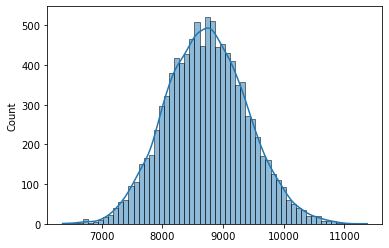

In [81]:
sns.histplot(data=sample_walmart_female,kde=True)
plt.show()

It is a gaussian distribution

In [88]:
sample_walmart_female_mean=np.mean(sample_walmart_female)
sample_walmart_female_mean

8730.132466000001

In [89]:
sample_walmart_female_std=np.std(sample_walmart_female)
sample_walmart_female_std

665.1526256067842

In [90]:
np.percentile(sample_walmart_female,2.5)

7464.67

In [91]:
np.percentile(sample_walmart_female,97.5)

10063.2775

The values obtained from CLT for female purchases are: Mean:8734.56 , 95% CI(7413.180395716255, 10055.951134594696)

The values obtained from sample distribution of mean for female purchases are: Mean:8730.132466000001 , 95% CI (7464.67,10063.2775)

**The values obtained from both appling CLT and by creating sample distribution of means gives the same result for all mean and confidence interval. It proves that just by applying CLT we can solve complex problems of probability distribution without applying bootstrapping method.**

# CLT and Confidence Interval for Married and Unmarried People

In [50]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [52]:
walmart_unmarried=walmart.loc[walmart["Marital_Status"]==0,"Purchase"]
walmart_unmarried

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550056      254
550059       48
550062      473
550064      371
550066      365
Name: Purchase, Length: 324731, dtype: int64

In [53]:
walmart_married=walmart.loc[walmart["Marital_Status"]==1,"Purchase"]
walmart_married

6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060      494
550061      599
550063      368
550065      137
550067      490
Name: Purchase, Length: 225337, dtype: int64

As creating a sample of 50 million married and 50 million unmarried customers using bootstrap would take higher time, we will assume a sample distribution of means of 50 samples to create a population of 50 million.

As Central limit theorem states that the sample distribution of means will be a Gaussian distribution given that we consider a bigger sample.If Sample_size>30, we can assume Gaussian Distribution.

#### Married Calculations

In [55]:
married_sample_mean=walmart_married.mean()
married_sample_mean

9261.174574082374

In [56]:
married_population_std=walmart_married.std()

In [57]:
married_sample_std=married_population_std/np.sqrt(50)

90% Confidence Interval

In [58]:
z_90_lower_married=norm.ppf(0.05)

In [59]:
z_90_upper_married=norm.ppf(0.95)

In [60]:
married_90pct_confidence=(married_sample_mean+z_90_lower_married*married_sample_std,married_sample_mean+z_90_upper_married*married_sample_std)
married_90pct_confidence

(8094.1567957972975, 10428.192352367449)

95% Confidence Interval

In [61]:
z_95_lower_married=norm.ppf(0.025)

In [62]:
z_95_upper_married=norm.ppf(0.975)

In [63]:
married_95pct_confidence=(married_sample_mean+z_95_lower_married*married_sample_std,married_sample_mean+z_95_upper_married*married_sample_std)
married_95pct_confidence

(7870.587121631699, 10651.762026533048)

99% Confidence Interval

In [64]:
z_99_lower_married=norm.ppf(0.005)

In [65]:
z_99_upper_married=norm.ppf(0.995)

In [66]:
married_99pct_confidence=(married_sample_mean+z_99_lower_married*married_sample_std,married_sample_mean+z_99_upper_married*married_sample_std)
married_99pct_confidence

(7433.632875651405, 11088.716272513342)

#### Unmarried Calculations

In [67]:
unmarried_sample_mean=walmart_unmarried.mean()
unmarried_sample_mean

9265.907618921507

In [68]:
unmarried_population_std=walmart_unmarried.std()

In [69]:
unmarried_sample_std=unmarried_population_std/np.sqrt(50)

90% Confidence Interval


In [70]:
unmarried_90pct_confidence=(unmarried_sample_mean+z_90_lower*unmarried_sample_std,unmarried_sample_mean+z_90_upper*unmarried_sample_std)
unmarried_90pct_confidence

(8096.458876623868, 10435.356361219145)

95% Confidence Interval

In [71]:
unmarried_95pct_confidence=(unmarried_sample_mean+z_95_lower*unmarried_sample_std,unmarried_sample_mean+z_95_upper*unmarried_sample_std)
unmarried_95pct_confidence

(7872.423494186887, 10659.391743656124)

99% Confidence Interval

In [72]:
unmarried_99pct_confidence=(unmarried_sample_mean+z_99_lower*unmarried_sample_std,unmarried_sample_mean+z_99_upper*unmarried_sample_std)
unmarried_99pct_confidence

(7434.5590478078675, 11097.256190035145)

Married Purchases have a mean of 9261.17 with 95% Confidence Interval in range (7870.587121631699, 10651.762026533048)

Unmarried Purchases have a mean of 9265.90 with 95% Confidence Interval in range (7872.423494186887, 10659.391743656124)

As the 95% confidence interval of married and unmarried purchases **Coincides** with each other, the purchases of male and female are **statistically insignificant**

# CLT and Confidence Interval for different age band of people

In [92]:
walmart["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [94]:
walmart_seventeen=walmart.loc[walmart["Age"]=='0-17',"Purchase"]

In [95]:
walmart_twentyfive=walmart.loc[walmart["Age"]=='18-25',"Purchase"]

In [96]:
walmart_thirtyfive=walmart.loc[walmart["Age"]=='26-35',"Purchase"]

In [97]:
walmart_fortyfive=walmart.loc[walmart["Age"]=='36-45',"Purchase"]

In [98]:
walmart_fifty=walmart.loc[walmart["Age"]=='46-50',"Purchase"]

In [99]:
walmart_fiftyfive=walmart.loc[walmart["Age"]=='51-55',"Purchase"]

In [100]:
walmart_fiftyfiveplus=walmart.loc[walmart["Age"]=='55+',"Purchase"]

In [101]:
walmart_seventeen

0          8370
1         15200
2          1422
3          1057
85         7746
          ...  
549904      256
550012       26
550024       12
550035       61
550046      236
Name: Purchase, Length: 15102, dtype: int64

In [102]:
walmart_twentyfive

70         1780
71        10754
72         2802
73        19473
74        19672
          ...  
550000       14
550015      477
550017      363
550020       36
550032      491
Name: Purchase, Length: 99660, dtype: int64

In [103]:
walmart_thirtyfive

5         15227
9          7871
10         5254
11         3957
12         6073
          ...  
550058      121
550059       48
550061      599
550064      371
550065      137
Name: Purchase, Length: 219587, dtype: int64

In [104]:
walmart_fortyfive

18        11788
29        16352
30         8886
31         5875
32         8854
          ...  
550049      473
550050      368
550053      371
550054       60
550060      494
Name: Purchase, Length: 110013, dtype: int64

In [105]:
walmart_fifty

6         19215
7         15854
8         15686
52         5839
53        15912
          ...  
550041      488
550043       48
550052      239
550062      473
550067      490
Name: Purchase, Length: 45701, dtype: int64

In [106]:
walmart_fiftyfive

14         5378
15         2079
16        13055
17         8851
67        15872
          ...  
549985       24
550004       12
550037       62
550042      243
550063      368
Name: Purchase, Length: 38501, dtype: int64

In [107]:
walmart_fiftyfiveplus

4          7969
159        8596
160        5248
161       10592
162        3482
          ...  
549925      121
549989       12
550008       50
550030      376
550066      365
Name: Purchase, Length: 21504, dtype: int64

#### Walmart 0-17 calculations using CLT and confidence interval


In [108]:
seventeen_sample_mean=walmart_seventeen.mean()

In [109]:
seventeen_sample_mean

8933.464640444974

In [112]:
seventeen_population_std=walmart_seventeen.std()

In [113]:
seventeen_sample_std=seventeen_population_std/np.sqrt(50)

90% Confidence Interval

In [114]:
seventeen_90pct_confidence=(seventeen_sample_mean+z_90_lower*seventeen_sample_std,seventeen_sample_mean+z_90_upper*seventeen_sample_std)

In [115]:
seventeen_90pct_confidence

(7744.530422868527, 10122.39885802142)

95% Confidence Interval

In [116]:
seventeen_95pct_confidence=(seventeen_sample_mean+z_95_lower*seventeen_sample_std,seventeen_sample_mean+z_95_upper*seventeen_sample_std)

In [117]:
seventeen_95pct_confidence

(7516.762139836455, 10350.167141053493)

99% Confidence Interval

In [118]:
seventeen_99pct_confidence=(seventeen_sample_mean+z_99_lower*seventeen_sample_std,seventeen_sample_mean+z_99_upper*seventeen_sample_std)

In [119]:
seventeen_99pct_confidence

(7071.601950996227, 10795.32732989372)

#### Walmart 18-26 calculations using CLT and confidence interval 

In [121]:
twentyfive_sample_mean=walmart_twentyfive.mean()

In [122]:
twentyfive_sample_mean

9169.663606261289

In [123]:
twentyfive_population_std=walmart_twentyfive.std()

In [125]:
twentyfive_sample_std=twentyfive_population_std/np.sqrt(50)

90% Confidence Interval

In [126]:
twentyfive_90pct_confidence=(twentyfive_sample_mean+z_90_lower*twentyfive_sample_std,twentyfive_sample_mean+z_90_upper*twentyfive_sample_std)

In [127]:
twentyfive_90pct_confidence

(7998.592557783694, 10340.734654738882)

95% Confidence Interval

In [128]:
twentyfive_95pct_confidence=(twentyfive_sample_mean+z_95_lower*twentyfive_sample_std,twentyfive_sample_mean+z_95_upper*twentyfive_sample_std)

In [129]:
twentyfive_95pct_confidence

(7774.246384482343, 10565.080828040234)

99% Confidence Interval

In [130]:
twentyfive_99pct_confidence=(twentyfive_sample_mean+z_99_lower*twentyfive_sample_std,twentyfive_sample_mean+z_99_upper*twentyfive_sample_std)

In [131]:
twentyfive_99pct_confidence

(7335.774514988781, 11003.552697533796)

#### Walmart 26-35 Calculations using CLT and Confidence Interval

In [132]:
thirtyfive_sample_mean=walmart_thirtyfive.mean()

In [133]:
thirtyfive_sample_std=walmart_thirtyfive.std()/np.sqrt(50)

90% Confidence Interval

In [134]:
thirtyfive_90pct_confidence=(thirtyfive_sample_mean+z_90_lower*thirtyfive_sample_std,thirtyfive_sample_mean+z_90_upper*thirtyfive_sample_std)

In [135]:
thirtyfive_90pct_confidence

(8087.1546450161, 10418.226620723675)

95% Confidence Interval

In [136]:
thirtyfive_95pct_confidence=(thirtyfive_sample_mean+z_95_lower*thirtyfive_sample_std,thirtyfive_sample_mean+z_95_upper*thirtyfive_sample_std)

In [137]:
thirtyfive_95pct_confidence

(7863.868842621841, 10641.512423117934)

99% Confidence Interval

In [138]:
thirtyfive_99pct_confidence=(thirtyfive_sample_mean+z_99_lower*thirtyfive_sample_std,thirtyfive_sample_mean+z_99_upper*thirtyfive_sample_std)

In [139]:
thirtyfive_99pct_confidence

(7427.469407915763, 11077.911857824012)

#### walmart 36-45 Calculations using CLT and Confidence Interval

In [140]:
fortyfive_sample_mean=walmart_fortyfive.mean()

In [141]:
fortyfive_sample_std=walmart_fortyfive.std()/np.sqrt(50)

90% Confidence Interval

In [142]:
fortyfive_90pct_confidence=(fortyfive_sample_mean+z_90_lower*fortyfive_sample_std,fortyfive_sample_mean+z_90_upper*fortyfive_sample_std)

In [143]:
fortyfive_90pct_confidence

(8162.931047358126, 10499.770342477621)

95% confidence Interval

In [144]:
fortyfive_95pct_confidence=(fortyfive_sample_mean+z_95_lower*fortyfive_sample_std,fortyfive_sample_mean+z_95_upper*fortyfive_sample_std)

In [145]:
fortyfive_95pct_confidence

(7939.092812196464, 10723.608577639283)

99% Confidence Interval

In [146]:
fortyfive_99pct_confidence=(fortyfive_sample_mean+z_99_lower*fortyfive_sample_std,fortyfive_sample_mean+z_99_upper*fortyfive_sample_std)

In [147]:
fortyfive_99pct_confidence

(7501.613678983709, 11161.087710852038)

#### Walmart 45-50 calculations using CLT and Confidence Interval

In [148]:
fifty_sample_mean=walmart_fifty.mean()

In [149]:
fifty_sample_std=walmart_fifty.std()/np.sqrt(50)

90% Confidence Interval

In [150]:
fifty_90pct_confidence=(fifty_sample_mean+z_90_lower*fifty_sample_std,fifty_sample_mean+z_90_upper*fifty_sample_std)

In [151]:
fifty_90pct_confidence

(8053.164588237038, 10364.086806699617)

95% Confidence Interval

In [152]:
fifty_95pct_confidence=(fifty_sample_mean+z_95_lower*fifty_sample_std,fifty_sample_mean+z_95_upper*fifty_sample_std)

In [153]:
fifty_95pct_confidence

(7831.80886554919, 10585.442529387465)

99% Confidence Interval

In [154]:
fifty_99pct_confidence=(fifty_sample_mean+z_99_lower*fifty_sample_std,fifty_sample_mean+z_99_upper*fifty_sample_std)

In [155]:
fifty_99pct_confidence

(7399.181662143912, 11018.069732792743)

#### Walmart 50-55 calculations using CLT and COnfidence Interval

In [156]:
fiftyfive_sample_mean=walmart_fiftyfive.mean()

In [157]:
fiftyfive_sample_std=walmart_fiftyfive.std()/np.sqrt(50)


90% Confidence Interval

In [158]:
fiftyfive_90pct_confidence=(fiftyfive_sample_mean+z_90_lower*fiftyfive_sample_std,fiftyfive_sample_mean+z_90_upper*fiftyfive_sample_std)

In [159]:
fiftyfive_90pct_confidence

(8351.397539078236, 10718.218522842233)

95% Confidence Interval

In [160]:
fiftyfive_95pct_confidence=(fiftyfive_sample_mean+z_95_lower*fiftyfive_sample_std,fiftyfive_sample_mean+z_95_upper*fiftyfive_sample_std)

In [161]:
fiftyfive_95pct_confidence

(8124.687455481226, 10944.928606439245)

99% Confidence Interval

In [162]:
fiftyfive_99pct_confidence=(fiftyfive_sample_mean+z_99_lower*fiftyfive_sample_std,fiftyfive_sample_mean+z_99_upper*fiftyfive_sample_std)

In [163]:
fiftyfive_99pct_confidence

(7681.595457409579, 11388.020604510892)

#### Walmart 55+ Calculations using CLT and Confidence Interval

In [164]:
fiftyfiveplus_sample_mean=walmart_fiftyfiveplus.mean()

In [165]:
fiftyfiveplus_sample_std=walmart_fiftyfiveplus.std()/np.sqrt(50)

90 % Confidence Interval

In [168]:
fiftyfiveplus_90pct_confidence=(fiftyfiveplus_sample_mean+z_90_lower*fiftyfiveplus_sample_std,fiftyfiveplus_sample_mean+z_90_upper*fiftyfiveplus_sample_std)

In [169]:
fiftyfiveplus_90pct_confidence

(8170.51960204658, 10502.041316852228)

95% confidence Interval

In [170]:
fiftyfiveplus_95pct_confidence=(fiftyfiveplus_sample_mean+z_95_lower*fiftyfiveplus_sample_std,fiftyfiveplus_sample_mean+z_95_upper*fiftyfiveplus_sample_std)

In [171]:
fiftyfiveplus_95pct_confidence

(7947.190720606959, 10725.37019829185)

99% Confidence Interval

In [172]:
fiftyfiveplus_99pct_confidence=(fiftyfiveplus_sample_mean+z_99_lower*fiftyfiveplus_sample_std,fiftyfiveplus_sample_mean+z_99_upper*fiftyfiveplus_sample_std)

In [173]:
fiftyfiveplus_99pct_confidence

(7510.707090350419, 11161.85382854839)

**As all the values for confidence interval 95% for different age bands coincide with each other, the difference is statistically insignificant**

### Insights:

* It is found that the data doesnt indicate any statistical significant difference between male and female spending in Black friday Sale in Walmart
* It is noted that there is not any statistical significant difference between married and unmarried spending .
* Also there is not any statistical difference for different age band spending . However the turnout of people in age bracket 18-45 is much higher than rest others.
* The distribution of population for spending is not a Gaussian distribution, however the sample distribution of means given that the sample is large enough follows gaussian distribution and hence all the calculations can be done using central limit theorem.

### Recommendations:

* It is observed that the customer staying in particular city for around 1 year has the highest footfall in the Walmart store. So by providing some offers to them like early access, the sale further can be inreased.
* The people who have stayed in city for more than 1+ years whose footfall is little lesser than those around 1 year in city, their footfall can further be increased by providing some discounts.
* Targeted segmentation can also be incorporated by providing discounts to people of certain age band such as 18-25 years as their footfall is quite higher than rest.
* Equal spend on all genders for marketing as their spend is more or less same with male spending is little higher than female spending using their averages per transaction.
* Unmarried people tend to visit more often than married people. so by introducing some kind of couple products or couple games during entry, the married peoples' visits cam also be increased.